In [3]:
## just create a csv of the top features from the msm data set

import pandas as pd


df = pd.read_csv('MSM43.csv')
print(df.head())

df[0:2,:]


           sampleid  clientcodem  visitdate  d5__lactobacillus  \
0  Mehta1008.200097       200097  30-Jun-17              17130   
1  Mehta1009.200080       200080   3-Jul-17              15916   
2  Mehta1010.209052       209052   4-Jul-17               7702   
3  Mehta1011.208796       208796   4-Jul-17              17517   
4  Mehta1012.208826       208826   6-Jul-17               9360   

   d5__corynebacterium1  d5__gardnerella  d5__sneathia  d5__finegoldia  \
0                  2870             1581          1523             525   
1                  7449             2075          1055            2212   
2                  3349             1475          4306             397   
3                  7985             2040           856             550   
4                  6886             1729          3116             468   

   d5__anaerococcus  d5__peptoniphilus  ...    d5__facklamia  \
0              1058                742  ...              127   
1               619           

TypeError: unhashable type: 'slice'

In [2]:

# drop all the string features
df = df.drop(['sampleid','clientcodem','visitdate','specimen'],axis=1)




#create a pd series for each of them separately and then merge them into a data frame
feature_list = []
feature_min = []
feature_max = []
feature_median = []
feature_count = []
feature_mean = []
feature_stdev = []


#names
for col in df.columns:
    feature_list.append(col)

#min
for col in df.columns:
    feature_min.append(df[col].min())

#max
for col in df.columns:
    feature_max.append(df[col].max())

#median
for col in df.columns:
    feature_median.append(df[col].median())

#count
for col in df.columns:
    feature_count.append(df[col].sum())
    
#mean
for col in df.columns:
    feature_mean.append(df[col].mean())
    
#stdev
for col in df.columns:
    feature_stdev.append(df[col].std())
    


In [3]:
data = {'feature_name':feature_list,'min':feature_min,'max':feature_max,'median':feature_median,'count':feature_count,'mean':feature_mean,'stdev':feature_stdev}
df_top = pd.DataFrame(data)
df_top = df_top.sort_values(by=['count'],ascending=False)
print(df_top.head())


#write this dataframe to a csv
df_top.to_csv('msm_top_feat.csv')

        count          feature_name      max          mean   median      min  \
47  1709700.0        total_seq_read  92963.0  39760.465116  36450.0  24024.0   
48  1479019.0              top_taxa  83624.0  34395.790698  31976.0  19882.0   
0    638083.0     d5__lactobacillus  27204.0  14839.139535  15916.0   3916.0   
1    301354.0  d5__corynebacterium1  24430.0   7008.232558   6260.0    975.0   
49   230681.0                 Other  12355.0   5364.674419   4744.0   2800.0   

           stdev  
47  10969.282683  
48  10494.835110  
0    5489.046884  
1    3579.505332  
49   2203.950508  


In [4]:
## get the top 10 features and draw a correlation between them

col = ['d5__lactobacillus','d5__corynebacterium1','d5__gardnerella','d5__sneathia','d5__finegoldia','d5__anaerococcus','d5__peptoniphilus',
'd5__staphylococcus','d5__streptococcus','d5__veillonella']

df_top_features = df[col]
print(df_top_features.head())








   d5__lactobacillus  d5__corynebacterium1  d5__gardnerella  d5__sneathia  \
0              17130                  2870             1581          1523   
1              15916                  7449             2075          1055   
2               7702                  3349             1475          4306   
3              17517                  7985             2040           856   
4               9360                  6886             1729          3116   

   d5__finegoldia  d5__anaerococcus  d5__peptoniphilus  d5__staphylococcus  \
0             525              1058                742                 467   
1            2212               619               1119                 741   
2             397               685                343                 658   
3             550               452                818                 816   
4             468              5153               1355                3653   

   d5__streptococcus  d5__veillonella  
0                922        

In [5]:
data1 = pd.read_csv('msm_top_feat.csv')
print(data1)



import matplotlib.pyplot as plt
import pandas as pd
from pandas.tools.plotting import table

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, data1.head())  # where df is your data frame

plt.savefig('msm_feature_stat.png')



    Unnamed: 0      count                  feature_name      max  \
0           47  1709700.0                total_seq_read  92963.0   
1           48  1479019.0                      top_taxa  83624.0   
2            0   638083.0             d5__lactobacillus  27204.0   
3            1   301354.0          d5__corynebacterium1  24430.0   
4           49   230681.0                         Other  12355.0   
5            2   133703.0               d5__gardnerella  21206.0   
6            3   100775.0                  d5__sneathia  23609.0   
7            4    71918.0                d5__finegoldia  15562.0   
8            5    68404.0              d5__anaerococcus  10192.0   
9            6    50180.0             d5__peptoniphilus   4617.0   
10           7    45257.0            d5__staphylococcus   7337.0   
11           8    35204.0             d5__streptococcus   6006.0   
12           9    34141.0               d5__veillonella   5001.0   
13          10    32813.0                d5__pre

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: 'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.
  


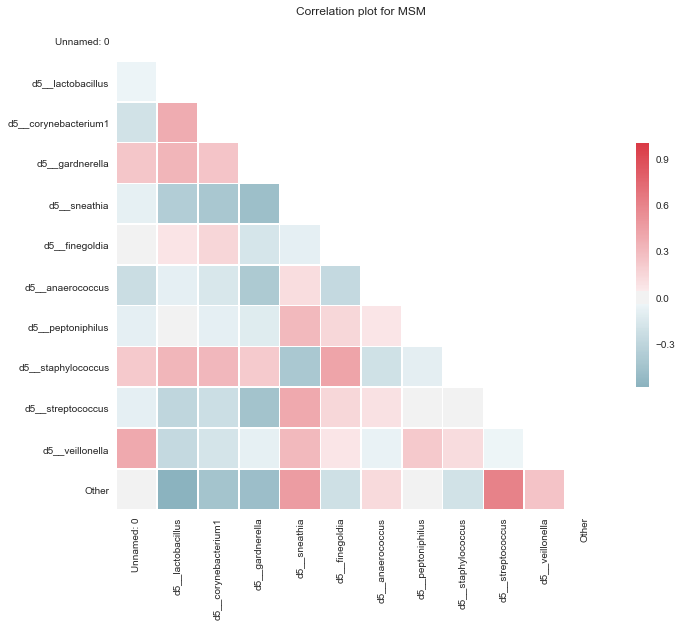

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(style='white')

## read from the new relative abundance data set
rel_abundance_msm = pd.read_csv('msm_tt_rel_abundance.csv')


corr = rel_abundance_msm.corr(method='spearman')


# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation plot for MSM')

plt.show()